<a href="https://colab.research.google.com/github/ChengYao0209/Kaggle_Ecommerce/blob/main/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
!unzip -uq /content/drive/MyDrive/DataScience/Kaggle/E-Commerce/E-Commerce.zip -d /content/

In [128]:
df=pd.read_csv("data.csv",encoding="ISO-8859-1")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


個人習慣，一開始先整理一下整體資料的基本資訊

In [129]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [130]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


很明顯有問題，Qty和unitprice不應該有負值出現!這部分後面處理

稍微翻譯一下這幾個column叫什麼 :)

1.InvoiceNo : 發票號碼

2.StockCode : 應該是在資料庫中貨物的編號

3.Description : 敘述XD

4.Quantity : 數量

5.InvoiceDate : 開出發票的日期

6.UnitPrice : 單價，所以一張發票的錢錢應該是unitprice*quantity

7.CustomerID : 客人編號

8.Country : 國家，應該是指消費的地點


In [131]:
df.shape

(541909, 8)

In [132]:
#所有貨物的種類
print(len(df["StockCode"].unique()))
df["StockCode"].unique()

4070


array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [133]:
#這些資料目前涵蓋那些國家
print(len(df["Country"].unique()))
df["Country"].unique()

38


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

從販售點來看的話全球都有據點(但看起來歐洲還是比較多)

東亞一代較少，反而中東一代(黎巴嫩,沙烏地阿拉伯)反而比較聚集

In [134]:
def spend(df):
  return df["UnitPrice"]*df["Quantity"]

df["Spend"]=df.apply(spend,axis=1)
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


In [135]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],format='%m/%d/%Y %H:%M')

In [136]:
df['Description'] = df["Description"].str.lower()

In [137]:
data=df.copy()
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spend
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


處理缺失值


In [138]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Spend               0
dtype: int64

目前有缺失值的在商品敘述/客人ID,現在我的想法是

1.
如果真的要想補這部分資訊的話可以嘗試從價錢回推看看
但是商品敘述基本上對於客人/錢錢分布其實不太有影響

2.
客戶ID,也就是哪位客人買了這些東西，對於今天想看的客人/錢錢分布其實也不太有影響

綜合以上，今天對於這兩列先不處理(或是drop),不過如果有想要做客戶行為分析&購買預測的話就需要完整的客戶ID.

In [139]:
data=data.dropna()
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spend
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [140]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Spend          0
dtype: int64

In [141]:
data['CustomerID'] = data['CustomerID'].astype('int64')

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
 8   Spend        406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 31.0+ MB


In [143]:
#移除數量與單價有問題的東西(此部分無法得知實際價格)
data = data[data["Quantity"] > 0]
data.describe()



,Quantity,UnitPrice,CustomerID,Spend
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [144]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spend
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [145]:
data.insert(loc=2, column='year-month', value=data['InvoiceDate'].map(lambda x:100*x.year + x.month))
data.insert(loc=3, column='month', value=data['InvoiceDate'].dt.month)
#因為.dt.dayofweek的機制，Monday=0, Sunday=6
#這邊稍微處理一下，可以變成1~7看看周回上有什麼變化
data.insert(loc=4, column='day', value=(data['InvoiceDate'].dt.dayofweek)+1)
data.insert(loc=5, column='hour', value=data['InvoiceDate'].dt.hour)
data.head(10)

,InvoiceNo,StockCode,year-month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spend
0,536365,85123A,201012,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,201012,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,201012,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,201012,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,201012,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,201012,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,201012,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


資料第一步處理完畢,接下來開始EDA,目前想知道三種事情

1.客人下了多少訂單

2.每個國家訂單狀況

3.時間序列的狀況


In [146]:
data_cut=data.copy()
data_country=data.copy()
data_time=data.copy()

In [147]:
#計算每位顧客購買的次數
orders=data_cut.groupby(by=["CustomerID","Country"],as_index=False)["InvoiceNo"].count()
orders

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4342,18280,United Kingdom,10
4343,18281,United Kingdom,7
4344,18282,United Kingdom,12
4345,18283,United Kingdom,756


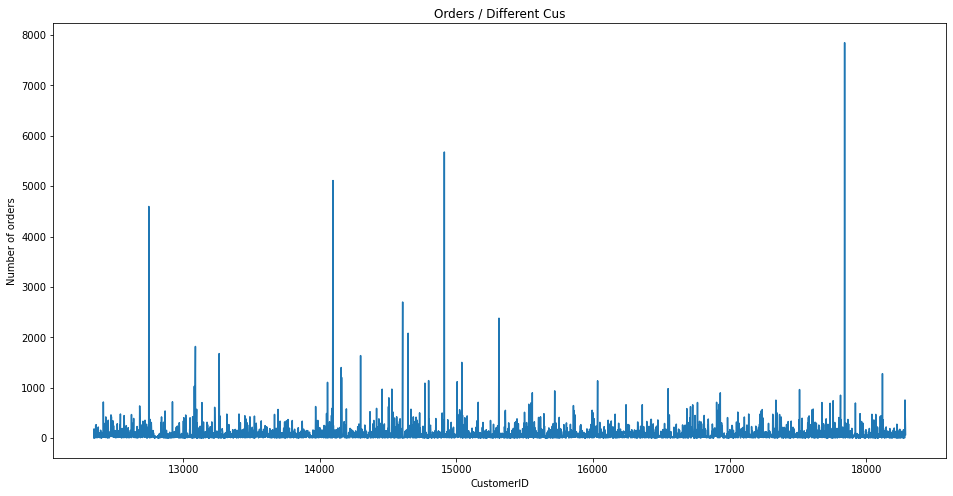

In [148]:
plt.subplots(figsize=(16,8))
plt.plot(orders["CustomerID"],orders["InvoiceNo"])
plt.xlabel("CustomerID")
plt.ylabel("Number of orders")
plt.title("Orders / Different Cus")

plt.show()



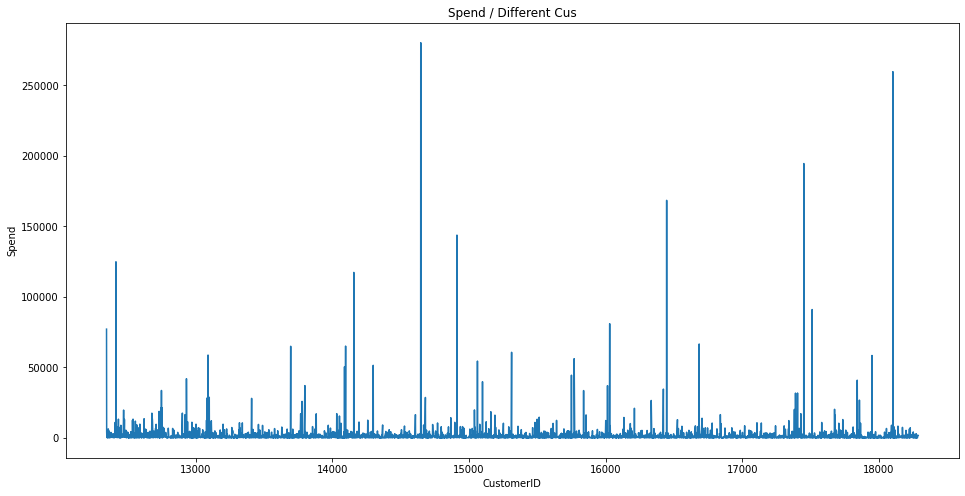

In [149]:
money_spentbycus=data_cut.groupby(by=["CustomerID","Country"],as_index=False)["Spend"].sum()
plt.subplots(figsize=(16,8))
plt.plot(money_spentbycus["CustomerID"],money_spentbycus["Spend"])
plt.xlabel("CustomerID")
plt.ylabel("Spend")
plt.title("Spend / Different Cus")

plt.show()

In [150]:
from pyparsing import actions
money_spentbycus.sort_values(by="Spend",ascending=False).head(10) #這邊可以得到對於實際銷售數字(錢)的排序

,CustomerID,Country,Spend
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


In [151]:
orders.sort_values(by="InvoiceNo",ascending=False).head(10) #得到所有個人購買頻率排行

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


接下來我想知道"時間"對於整體銷售的影響

我想要年月日時的方式去分類，看看是否能找到大致的趨勢或是現象

In [152]:
# data_time_month=data.groupby(by="month",as_index=False)
# data_time_year=data.groupby(by="year",as_index=False)
# data_time_day=data.groupby(by="day",as_index=False)
# data_time_hour=data.groupby(by="hour",as_index=False)

1.以小時來觀察

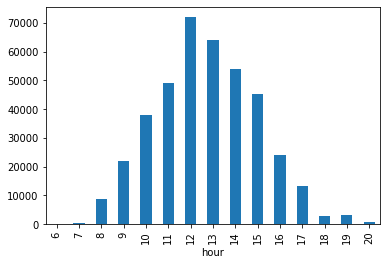

In [153]:

#plt.figure(figsize=(16,8))
#plt.title("Order by Hour", fontsize=15)
data_time_hour=data.groupby(["hour"])['InvoiceNo'].count()
data_time_hour.plot.bar()

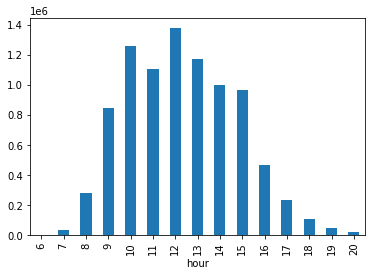

In [154]:
data_time_hour=data.groupby(["hour"])['Spend'].sum()
data_time_hour.plot.bar()

2.以日來觀察

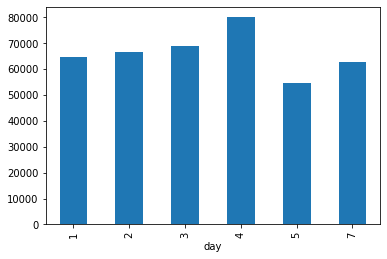

In [155]:
data_time_day=data.groupby(["day"])['InvoiceNo'].count()
data_time_day.plot.bar()

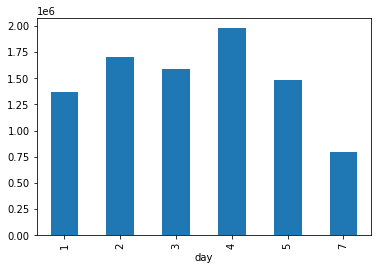

In [156]:
data_time_day=data.groupby(["day"])['Spend'].sum()
data_time_day.plot.bar()

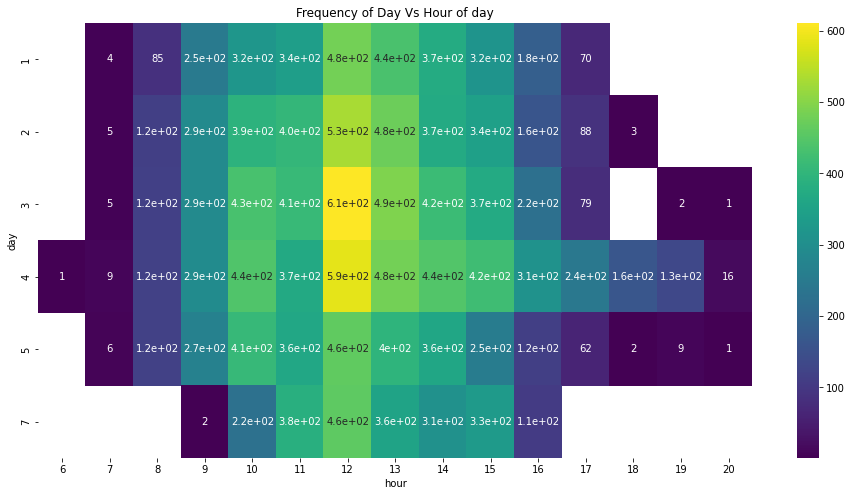

In [157]:
grouped_df  = data.groupby(["day", "hour"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["InvoiceNo"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('day', 'hour', 'InvoiceNo')

plt.figure(figsize=(16,8))
sns.heatmap(grouped_df,annot=True,cmap="viridis")
plt.title("Frequency of Day Vs Hour of day")
plt.show()

3.以月來觀察

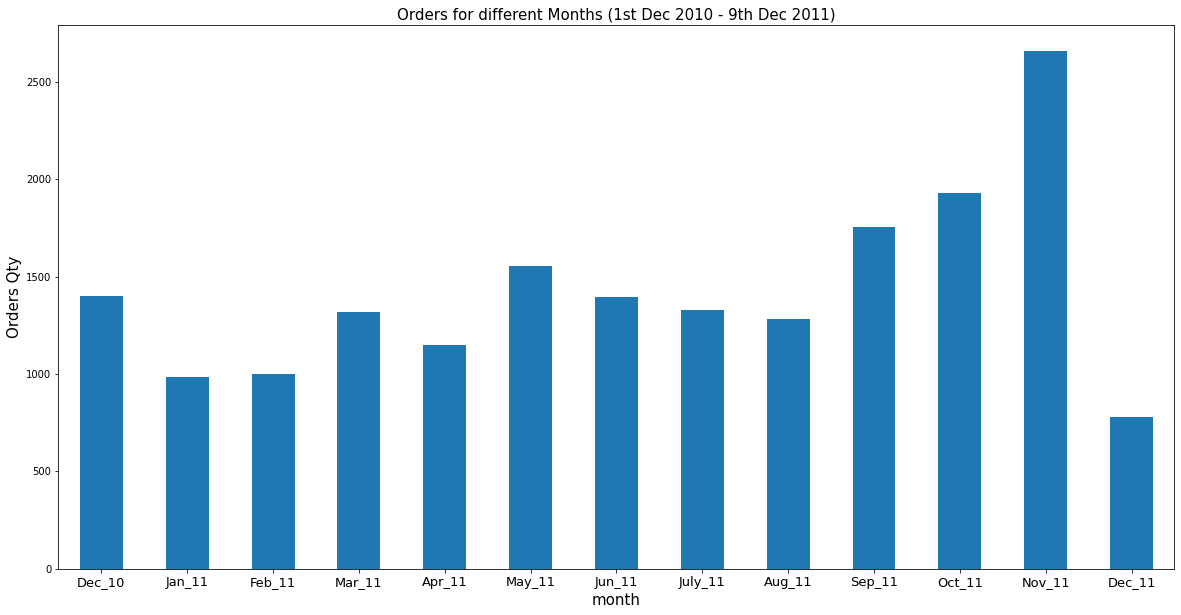

In [162]:
ax = data.groupby('InvoiceNo')['year-month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(20,10))
ax.set_xlabel('month',fontsize=15)
ax.set_ylabel('Orders Qty',fontsize=15)
ax.set_title('Orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

稍微做一點關於銷售-時間的結論

1.每天的銷售(數量，非數據)來說其實沒有差這麼多。不過周末的銷量確實比較好，或許可以做一個周末special來刺激消費

2.從時段來說其實在意料之內，有點像是常態分布。在中午前後是最多的
(這部分原因可能是因為大家這個時間段開始吃飯休息，比較有時間做消費行為。這部分其實讓我想到有些演唱會或是拍賣確實是從中午開始)



接下來看一下關於不同國家之間的差異


In [168]:
data_country=data.groupby(by="Country")["InvoiceNo"].count().sort_values(ascending=False)
data_country

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


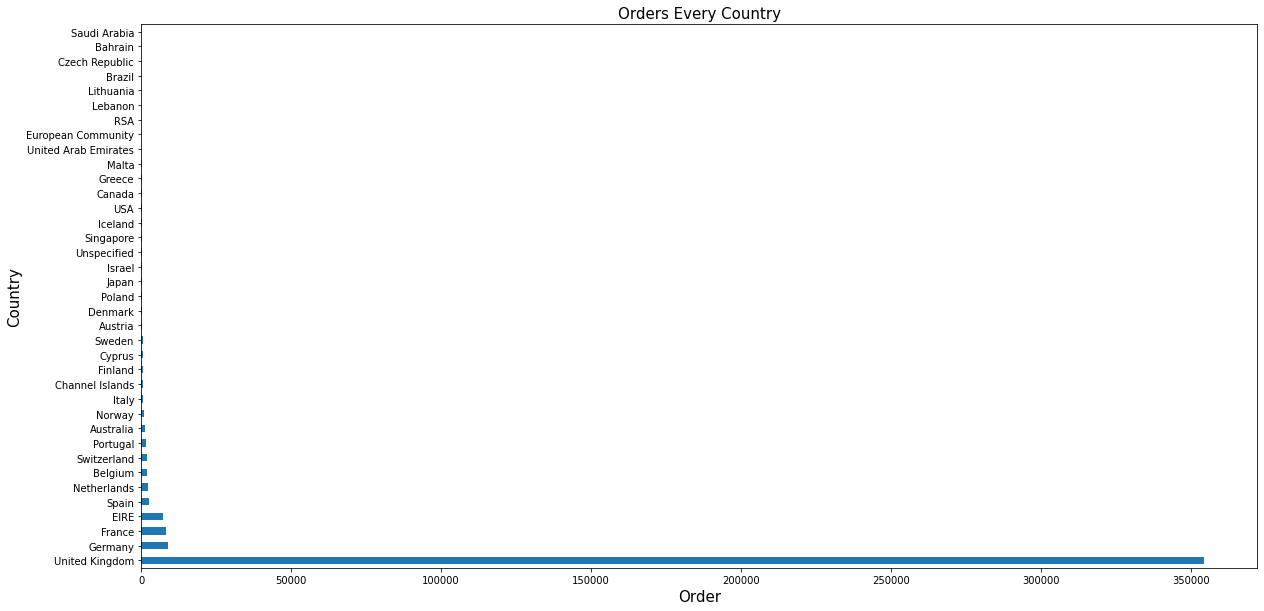

In [169]:
ax = data_country.plot(kind="barh",figsize=(20,10))
ax.set_xlabel('Order',fontsize=15)
ax.set_ylabel('Country',fontsize=15)
ax.set_title("Orders Every Country" ,fontsize=15)
plt.show()

其實從數字來看的話就可以知道，這間公司現在應該是以UK為銷售大重點
我覺得這邊還是把UK跟其他國家分開比較好

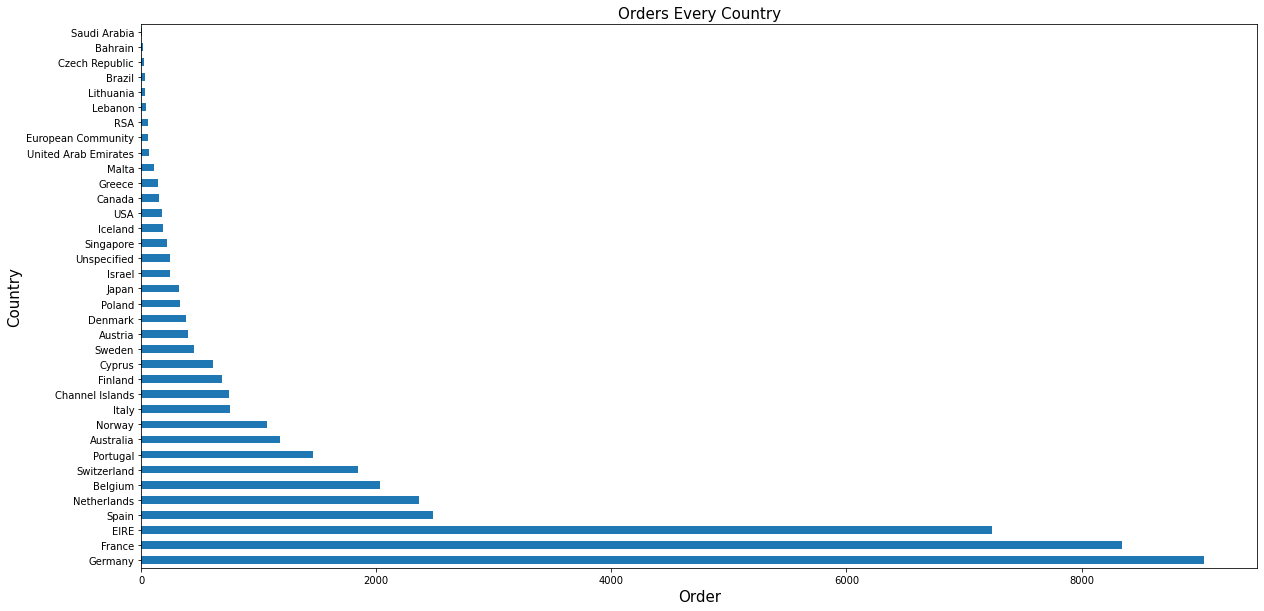

In [170]:
data_country1=data_country.drop(labels="United Kingdom",axis=0)
ax = data_country1.plot(kind="barh",figsize=(20,10))
ax.set_xlabel('Order',fontsize=15)
ax.set_ylabel('Country',fontsize=15)
ax.set_title("Orders Every Country" ,fontsize=15)
plt.show()

OK

比例上來看可以知道,目前這間公司應該是以西歐(英國,德國,法國,愛爾蘭)為銷售重點